#**_K-means clustering_**

is a common example of an exlusive clustering method where data points are

assigned into K groups,where K represents the number of clusters based on the

distance from each group's centroid.The data points closest to a given

centroid will be clustered under the same category.A larger K value will

be indicative of smaller groupings whereas a smaller K value will have larger

groupings,K -Means clustering is commonly used in market segmentation,

document clustering,image segmentation and image compression

**1)Initialization:**


Choose the number of clusters(K)you want to identify.Randomly initialize the

centroids of the K-clusters

**2)Assignment:**


Assign each data point to the nearest centroid forming K clusters

Finding the best cluster centroids in K-means clustering involves the

initialization that results in the most optimal clustering solution

Since K-means is sensitive to the initial placement of centroids running

the algorithm with different initializations and choosing the one with the

lowest cost(sum of squared distances from each point to its assigned centroid)

is a common apporach

**3)Update Centroid:**


Calculate the mean of the data points in. each cluster.Move the centroid

to the calculated mean

**4)Repeat:**

Repeat steps 2 and 3 until convergence is reached(centroids no longer change

significantly)

**5)Result:**


The algorithm converges to a solution where the data points are grouped into

K clusters,and each cluster is represented by its centroid

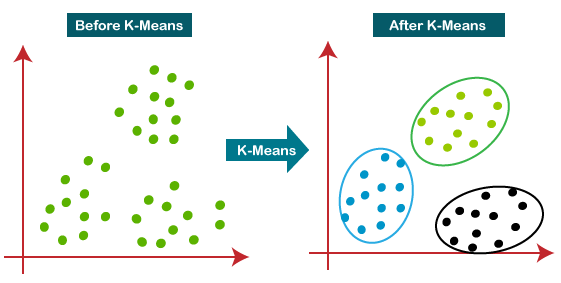

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/MACHINE LEARNING /Unsupervised Learning/Kmeans/kmeansData (2).csv',header = None)
df

,0,1
0,1.42,0.67
1,2.05,1.70
2,3.20,3.52
3,3.70,0.15
4,4.70,1.45
5,6.17,2.67
6,7.80,3.70
7,8.74,4.52
8,9.25,2.15
9,9.70,3.45


In [ ]:
df.head()

,0,1
0,1.42,0.67
1,2.05,1.70
2,3.20,3.52
3,3.70,0.15
4,4.70,1.45


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10 non-null     float64
 1   1       10 non-null     float64
dtypes: float64(2)
memory usage: 288.0 bytes


In [ ]:
df.shape

(10, 2)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init = 'k-means++', random_state = 0)
kmeans.fit(df)
kmeans.inertia_

15.485441666666665

In [ ]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init='auto', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |      For an example of how to choose an optimal value for `n_clusters` refer to
 |      :ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      * 'k-means++' : selects initial cluster centroids using sampling             based on an empirical probability distribution of the points'             contribution to t

In [ ]:
from sklearn.cluster import KMeans
fat = []

In [ ]:
for i in range(1,10):
  kmeans1 = KMeans(n_clusters=i, init = 'k-means++', random_state = 0)
  kmeans1.fit(df)
  fat.append(kmeans1.inertia_)

In [ ]:
fat

[103.48316999999999,
 24.68036,
 15.485441666666665,
 13.718358333333336,
 10.550233333333335,
 3.7981499999999997,
 2.8518999999999997,
 1.5068999999999995,
 0.7288999999999999]

#**ELBOW CLUSTER**

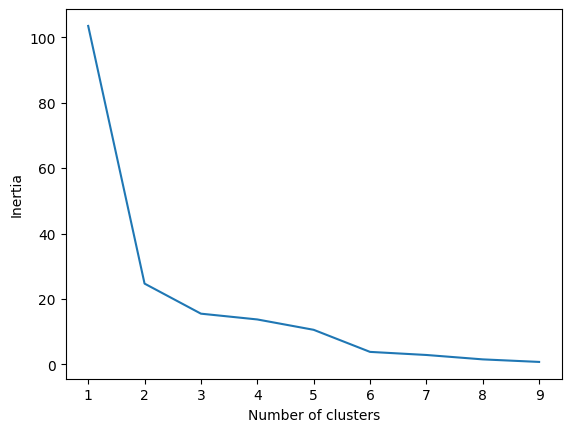

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,10),fat)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(df)
y_kmeans

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
df['clusters'] = y_kmeans
df

,0,1,clusters
0,1.42,0.67,1
1,2.05,1.70,1
2,3.20,3.52,1
3,3.70,0.15,1
4,4.70,1.45,1
5,6.17,2.67,0
6,7.80,3.70,0
7,8.74,4.52,0
8,9.25,2.15,0
9,9.70,3.45,0
